<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/kalman4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

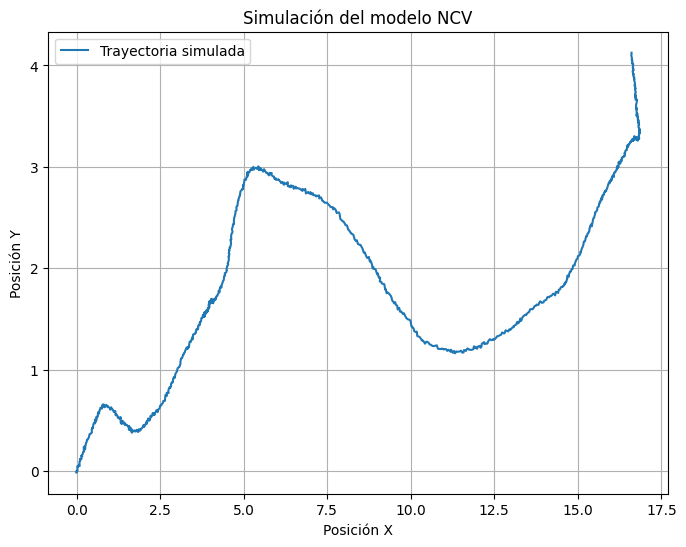

In [1]:
# Simulación del modelo NCV en Google Colab

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
maxT = 1000  # Número de pasos de simulación
dT = 0.1  # Período de muestreo

# Matrices del modelo NCV
A = np.array([[1, dT, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, dT],
              [0, 0, 0, 1]])

Bw = np.array([[dT**2 / 2, 0],
               [dT, 0],
               [0, dT**2 / 2],
               [0, dT]])

C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

# Entradas aleatorias
w = 0.1 * np.random.randn(maxT, 2).T  # Transponer para que coincida con Bw
v = 0.01 * np.random.randn(maxT, 2).T  # Transponer para que coincida con C

# Estado inicial
x = np.zeros((4, maxT))
x[:, 0] = np.array([0, 0.1, 0, 0.1])

# Simulación manual con lazo for
y_measured = np.zeros((maxT, 2))
for t in range(1, maxT):
    x[:, t] = A @ x[:, t - 1] + Bw @ w[:, t - 1]
    y_measured[t, :] = (C @ x[:, t]).T + v[:, t]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(y_measured[:, 0], y_measured[:, 1], label="Trayectoria simulada")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Simulación del modelo NCV")
plt.legend()
plt.grid()
plt.show()

